# Human Stress Detection in and through Sleep

In this prokect we will predict stress level by the following parameters:

Main Features:
* snoring rate      // הנחירות
* respiration rate  //קצב הנשימה
* body temperature  // טמפרטורה
* limb movement     // קצב תנועת הגפיים
* blood ohygen      // רמות החמצן בדם 
* eye movement      // תנועת העיניים
* sleeping hours    // מספר שעות השינה
* heart rate        // קצב הלב
* stress level      // רמת הלחץ 

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn as kl

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('SaYoPillow.csv')
df.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                     't':'body temperature', 'lm':'limb movement', 
                     'bo':'blood oxygen', 'rem':'eye movement', 
                     'sr.1':'sleeping hours','hr':'heart rate', 
                     'sl':'stress level'}, inplace = True)

In [3]:
df.head(10)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


## Getting to know the data

In [4]:
print('show numeric values stats:')
df.describe()

show numeric values stats:


,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


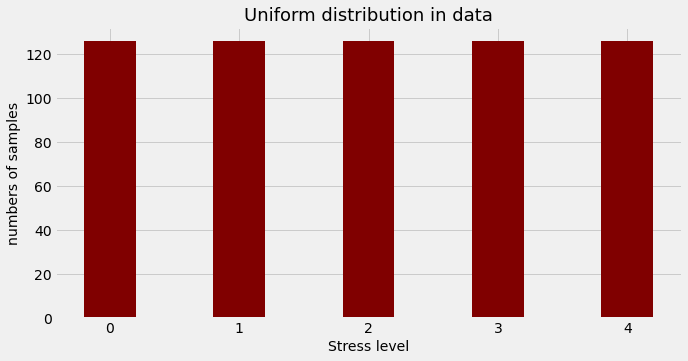

In [5]:
fig = plt.figure(figsize = (10, 5))
y = df[df.columns[-1]].values 
unique, counts = np.unique(y, return_counts=True)

# creating the bar plot
plt.bar(unique, counts, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stress level", fontsize=14)
plt.ylabel("numbers of samples", fontsize=14)
plt.title("Uniform distribution in data", fontsize=18)
plt.show()

### Prepering the data

In [6]:
df.dtypes

snoring rate        float64
respiration rate    float64
body temperature    float64
limb movement       float64
blood oxygen        float64
eye movement        float64
sleeping hours      float64
heart rate          float64
stress level          int64
dtype: object

In [7]:
# check wather there is NaN value in the data frame
df.isnull().values.any()

False

## Split to X and Y

In [8]:
# split the dataset into X and y
X = df[df.columns[:-1]]
y = df[df.columns[-1]].values

In [9]:
# normalization ( value/max - min)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X.values)
X[:10]

array([[0.88727273, 0.69142857, 0.48857143, 0.84      , 0.52266667,
        0.88      , 0.20444444, 0.69142857],
       [0.848     , 0.65028571, 0.468     , 0.792     , 0.50346667,
        0.864     , 0.17244444, 0.65028571],
       [0.27272727, 0.28571429, 0.78571429, 0.4       , 0.86666667,
        0.55555556, 0.77777778, 0.28571429],
       [0.74109091, 0.53828571, 0.412     , 0.66133333, 0.4512    ,
        0.82044444, 0.08533333, 0.53828571],
       [0.05672727, 0.08914286, 0.91942857, 0.1664    , 0.94986667,
        0.27733333, 0.91644444, 0.08914286],
       [0.216     , 0.24114286, 0.74114286, 0.3584    , 0.80426667,
        0.52088889, 0.70844444, 0.24114286],
       [0.03636364, 0.05714286, 0.87142857, 0.10666667, 0.92      ,
        0.17777778, 0.86666667, 0.05714286],
       [0.09090909, 0.14285714, 1.        , 0.26666667, 1.        ,
        0.44444444, 1.        , 0.14285714],
       [0.00509091, 0.008     , 0.79771429, 0.01493333, 0.87413333,
        0.02488889, 0.790222

Obviously sleeping hours is very important for good sleep, and influance the stress level

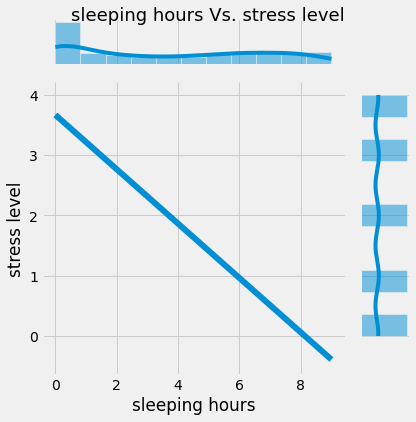

In [10]:
p = sns.jointplot(x='sleeping hours', y='stress level',kind='reg', data=df)
p.fig.suptitle("sleeping hours Vs. stress level", fontsize=18)
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

Lets look on the relationship between stress level to each pair from the features:

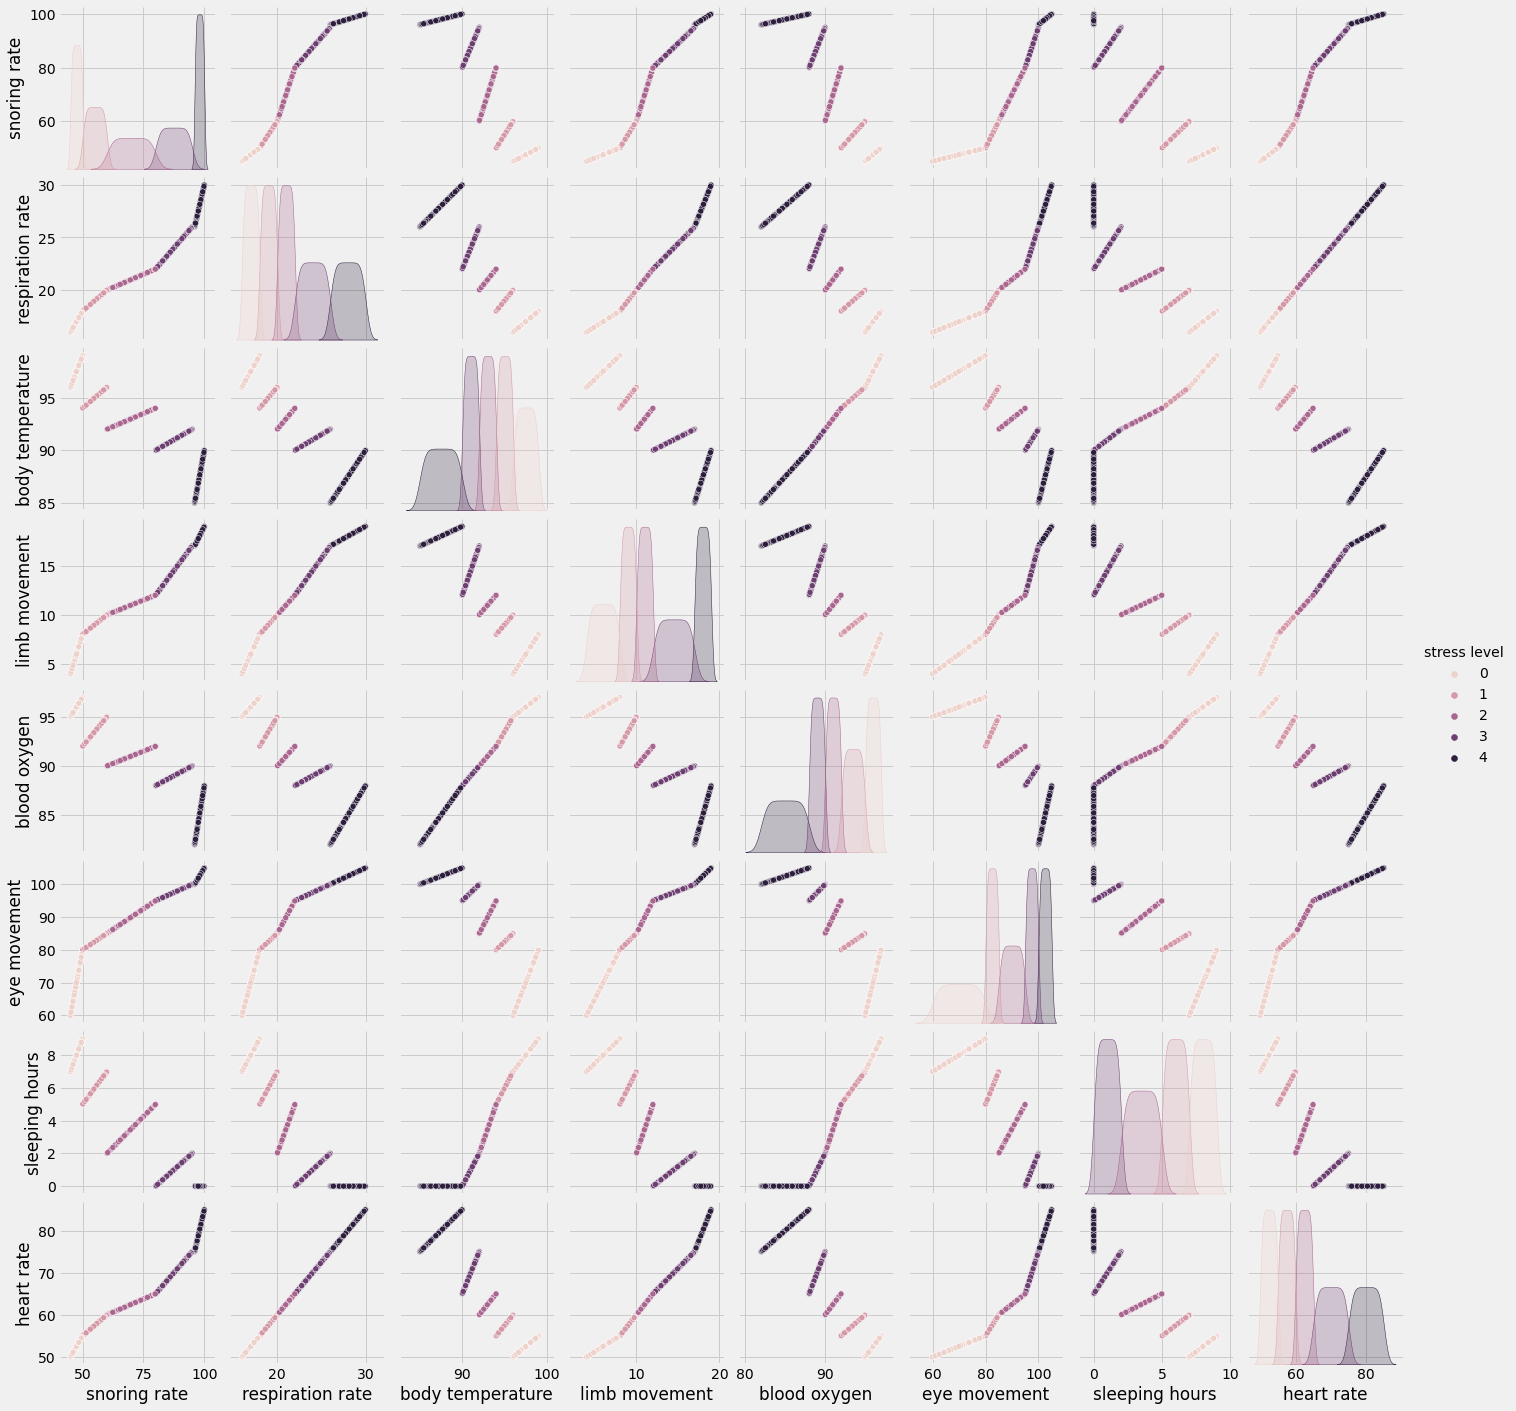

In [11]:
sns.pairplot(df, hue='stress level')

### Train Test spilt

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
feature_list = df.columns[:-1].values
print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(441, 8) (441,) (189, 8) (189,)


# Model Evaluation

In [13]:
algorithms_accuracy = []
lst = ['Logistic Reggression', 'Descion Tree', 'Random Forest', 'Adaboost']
lst = ['Descion Tree', 'Random Forest', 'Adaboost']
df_importance = pd.DataFrame(index=feature_list, columns=lst)

## 1. Logistic Regression

We will check Logistic Regression algorithm with different numbers of features

In [14]:
# Train Test spilt
X_train_log, X_test_log, y_train_log, y_test_log = X_train, X_test, y_train, y_test

In [15]:
# train logistic regression model
model_log = LogisticRegression(solver='newton-cg')
model_log.fit(X_train_log, y_train_log)
print('done train')

done train


In [16]:
# predict on test set
y_pred_log = model_log.predict(X_test_log)

In [17]:
print('confusion matrix:')
print(confusion_matrix(y_test_log, y_pred_log))
print(classification_report(y_test_log,y_pred_log))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [18]:
all_accuracy = []
all_accuracy.append(accuracy_score(y_test_log, y_pred_log, normalize=True, sample_weight=None))

Text(0.5, 1.0, 'Confusion matrix')

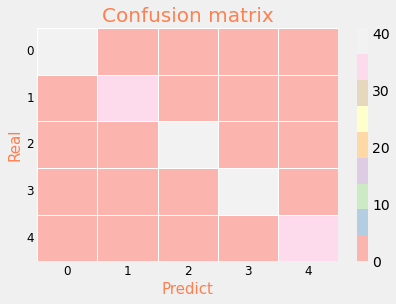

In [19]:
df_matrix=pd.DataFrame(data=confusion_matrix(y_test_log, y_pred_log),index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

In [20]:
# see features weight
parameters=dict(zip(df.columns[:-1].values,model_log.coef_[0]))
model_log.coef_[0]

array([-2.19185372, -2.13016936,  3.05173155, -2.81602656,  2.73426631,
       -3.75394042,  3.76633418, -2.13016936])

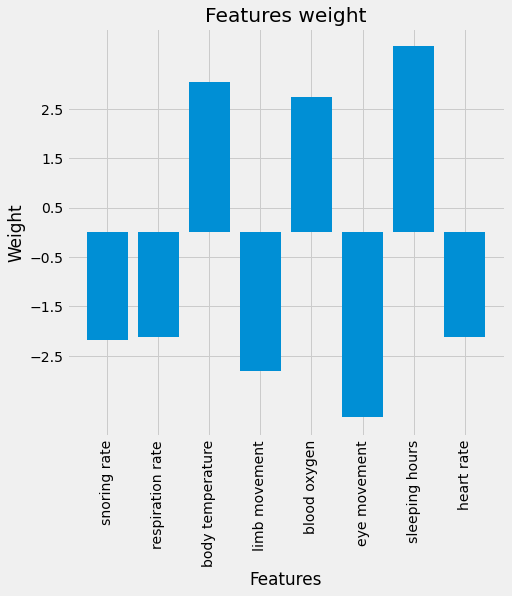

In [21]:
p_lr = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(-2.5, 3.5, 1))

# list of x locations for plotting
x_values = list(range(len(feature_list)))
weigth_lr = model_log.coef_[0]
# Make a bar chart
plt.bar(x_values, weigth_lr, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Weight'); plt.xlabel('Features'); plt.title('Features weight');

# df_importance['Logistic Reggression'] = abs(weigth_lr)
df_importance['Logistic Reggression'] = weigth_lr


### Check the Logistic Regression model on the 4 significant features

In [22]:
df_log1 = df[['sleeping hours', 'eye movement','body temperature','limb movement', 'stress level']]
df_log1

,sleeping hours,eye movement,body temperature,limb movement,stress level
0,1.840,99.60,91.840,16.600,3
1,1.552,98.88,91.552,15.880,3
2,7.000,85.00,96.000,10.000,1
3,0.768,96.92,90.768,13.920,3
4,8.248,72.48,97.872,6.496,0
...,...,...,...,...,...
625,3.440,89.80,92.960,10.960,2
626,8.376,73.76,98.064,6.752,0
627,0.000,101.88,86.880,17.752,4
628,6.728,84.32,95.728,9.728,1


In [23]:
# split the dataset into X and y
X_log1 = df_log1[df_log1.columns[:-1]]
y_log1 = df_log1[df_log1.columns[-1]].values

# train test split
X_train_log1, X_test_log1, y_train_log1, y_test_log1 = train_test_split(X_log1, y_log1, test_size=0.3, random_state=42)
# print(f'{X_train_log1.shape} {y_train_log1.shape} {X_test_log1.shape} {y_test_log1.shape}')

# train logistic regression model
model_log1 = LogisticRegression(solver='newton-cg')
model_log1.fit(X_train_log1, y_train_log1)

# predict on test set
y_pred_log1 = model_log1.predict(X_test_log1)

print('confusion matrix:')
print(confusion_matrix(y_test_log1, y_pred_log1), "\n")
accuracy = accuracy_score(y_test_log1, y_pred_log1, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log1,y_pred_log1))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 1.0


### Check the Logistic Regression model on the 3 significant features

In [24]:
df_log2 = df[['sleeping hours', 'eye movement','body temperature','stress level']]
df_log2

,sleeping hours,eye movement,body temperature,stress level
0,1.840,99.60,91.840,3
1,1.552,98.88,91.552,3
2,7.000,85.00,96.000,1
3,0.768,96.92,90.768,3
4,8.248,72.48,97.872,0
...,...,...,...,...
625,3.440,89.80,92.960,2
626,8.376,73.76,98.064,0
627,0.000,101.88,86.880,4
628,6.728,84.32,95.728,1


In [25]:
# split the dataset into X and y
X_log2 = df_log2[df_log2.columns[:-1]]
y_log2 = df_log2[df_log2.columns[-1]].values

# train test split
X_train_log2, X_test_log2, y_train_log2, y_test_log2 = train_test_split(X_log2, y_log2, test_size=0.3, random_state=42)

# train logistic regression model
model_log2 = LogisticRegression(solver='newton-cg')
model_log2.fit(X_train_log2, y_train_log2)

# predict on test set
y_pred_log2 = model_log2.predict(X_test_log2)

print('confusion matrix:')
print(confusion_matrix(y_test_log2, y_pred_log2), "\n")
accuracy = accuracy_score(y_test_log2, y_pred_log2, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log2,y_pred_log2))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 1.0


### Check the Logistic Regression model on the 2 significant features

Text(0.5, 0.98, 'Dependence of stress level on sleeping hours and eye movement')

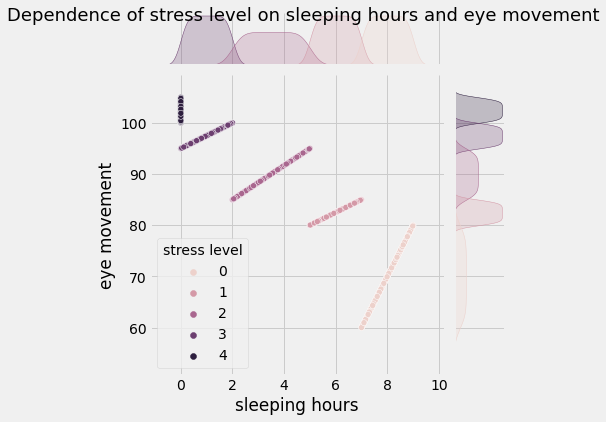

In [26]:
p = sns.jointplot(x='sleeping hours', y='eye movement', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and eye movement", fontsize=18)

We can see that high 'eye movement' use to have high stress level, and long sleeping use to have low stress level.
In addition, the more you sleep, the less you have eye movement (on the contrary). 

In [27]:
df_log3 = df[['sleeping hours', 'eye movement','stress level']]
df_log3

,sleeping hours,eye movement,stress level
0,1.840,99.60,3
1,1.552,98.88,3
2,7.000,85.00,1
3,0.768,96.92,3
4,8.248,72.48,0
...,...,...,...
625,3.440,89.80,2
626,8.376,73.76,0
627,0.000,101.88,4
628,6.728,84.32,1


In [28]:
# split the dataset into X and y
X_log3 = df_log3[df_log3.columns[:-1]]
y_log3 = df_log2[df_log3.columns[-1]].values

# train test split
X_train_log3, X_test_log3, y_train_log3, y_test_log3 = train_test_split(X_log3, y_log3, test_size=0.3, random_state=42)

# train logistic regression model
model_log3 = LogisticRegression()
model_log3.fit(X_train_log3, y_train_log3)

# predict on test set
y_pred_log3 = model_log3.predict(X_test_log3)

print('confusion matrix:')
print(confusion_matrix(y_test_log3, y_pred_log3), "\n")
accuracy = accuracy_score(y_test_log3, y_pred_log3, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log3,y_pred_log3))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 29  8]
 [ 0  0  0  0 36]] 

accuracy: 0.9576719576719577


C:\Users\hwiesel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Check the Logistic Regression model on the 1 significant features

Text(0, 0.5, 'Stress level')

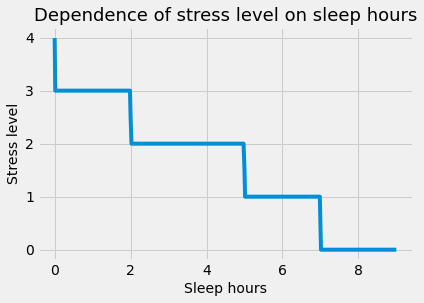

In [29]:
sleep_hours_plot = sns.lineplot(data=df, x='sleeping hours',y='stress level')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleep hours", fontsize=18)
sleep_hours_plot.set_xlabel("Sleep hours", fontsize=14)
sleep_hours_plot.set_ylabel("Stress level", fontsize=14)

In [30]:
df_log4 = df[['sleeping hours','stress level']]
df_log4

,sleeping hours,stress level
0,1.840,3
1,1.552,3
2,7.000,1
3,0.768,3
4,8.248,0
...,...,...
625,3.440,2
626,8.376,0
627,0.000,4
628,6.728,1


In [31]:
# split the dataset into X and y
X_log4 = df_log4[df_log4.columns[:-1]]
y_log4 = df_log4[df_log4.columns[-1]].values

# train test split
X_train_log4, X_test_log4, y_train_log4, y_test_log4 = train_test_split(X_log4, y_log4, test_size=0.3, random_state=42)

# train logistic regression model
model_log4 = LogisticRegression(solver='newton-cg')
model_log4.fit(X_train_log4, y_train_log4)

# predict on test set
y_pred_log4 = model_log4.predict(X_test_log4)

print('confusion matrix:')
print(confusion_matrix(y_test_log4, y_pred_log4), "\n")
accuracy = accuracy_score(y_test_log4, y_pred_log4, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log4,y_pred_log4))

confusion matrix:
[[38  1  0  0  0]
 [ 0 36  0  0  0]
 [ 0  1 39  1  0]
 [ 0  0  0 29  8]
 [ 0  0  0  0 36]] 

accuracy: 0.9417989417989417


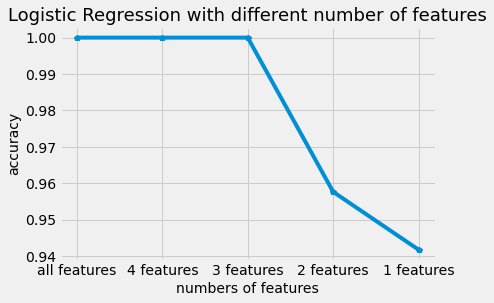

In [32]:
x = ['all features', '4 features', '3 features', '2 features', '1 features']
plt.plot(x, all_accuracy, 'p', linestyle="-")
plt.title("Logistic Regression with different number of features", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('numbers of features', fontsize=14)
plt.show()

In [33]:
algorithms_accuracy.append(accuracy_score(y_test_log3, y_pred_log3, normalize=True, sample_weight=None))

* Model that based on three or more features has 100% accuracy.
* The chosen model will be with the three features- sleeping hours, eye movement and body temperature.

## 2. Decision Tree

We will check Decision Tree algorithm with different depths

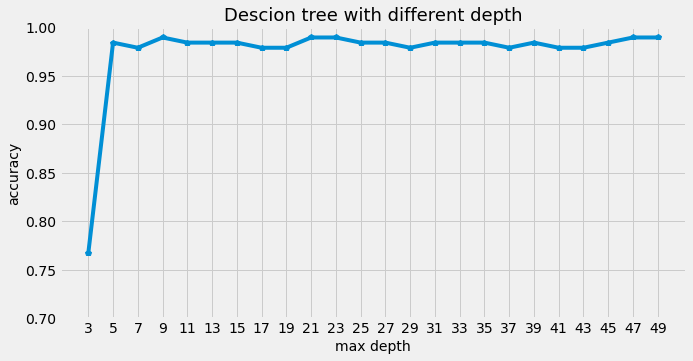

In [34]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range (3,50,2):
    
    # Train Test spilt
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = X_train, X_test, y_train, y_test
    
    #Create the model with i Neighbors
    model_dt = DecisionTreeClassifier(max_depth=i)
    
    # Fit on training data
    model_dt.fit(X_train_dt, y_train_dt)
    
    # Actual class predictions
    y_pred_dt = model_dt.predict(X_test_dt)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_dt, y_pred_dt, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_dt, y_pred_dt))
    reports.append(classification_report(y_test_dt,y_pred_dt, zero_division=0))
    models.append(model_dt)


#plot the results:
p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Descion tree with different depth", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('max depth', fontsize=14)
plt.xticks(np.arange(3, 50, 2))
plt.yticks(np.arange(0.7, 1.00, 0.05))
plt.show()

In [35]:
best_index = np.argmax(accuracy)   # start with index 0
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_depth = 3 + best_index*2
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

### Best Tree:

In [36]:
print("Best Tree with depth", best_depth, "\nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best Tree with depth 9 
with accuracy 0.9894179894179894 

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.97      0.99        36
           2       1.00      0.98      0.99        41
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



Text(0.5, 1.0, 'Confusion matrix')

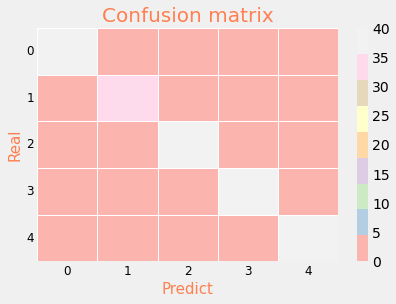

In [37]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

#### See features importance:

In [38]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Descion Tree'] = importances

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_dt = []
features_list_order = []
for v, i in feature_importances:
    importances_dt.append(i)
    features_list_order.append(v)


Text(0.5, 1.0, 'Features Importances')

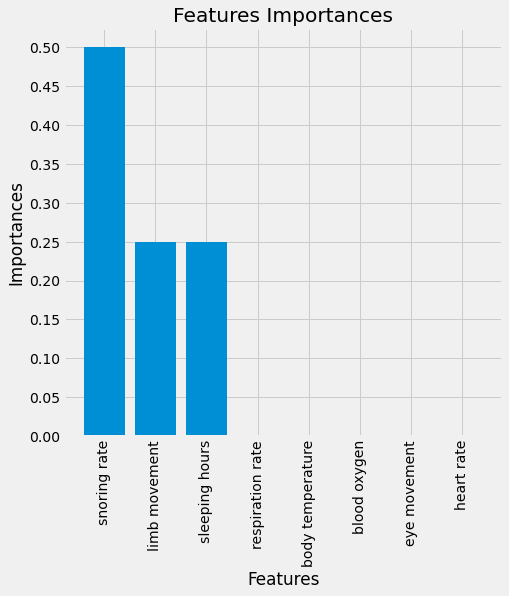

In [39]:
p_dt = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.6, 0.05))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_dt, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features')
plt.title('Features Importances')

## 3. Random Forest

We will check Random Forest algorithm with different max-features and different number of trees.

In [73]:
# Train Test spilt
X_train_ran, X_test_ran, y_train_ran, y_test_ran = X_train, X_test, y_train, y_test

* n_estimatorsint (default=100):
    the number of trees in the forest

* bootstrapbool (default=True)
  Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

* max_features (default= 'sqrt' =sqrt(n_features)):
    The number of features to consider when looking for the best split
    
* max_depth (default=None):
    If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

## Different max-features

### 1. consider all features:

In [74]:
# Create the model
model_ran1 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features=None)

# Fit on training data
model_ran1.fit(X_train_ran, y_train_ran)

# Actual class predictions
y_pred_ran1 = model_ran1.predict(X_test_ran)

print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran1), "\n")
# print(classification_report(y_test_ran,y_pred_ran1))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran1, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 0 35  1  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9947089947089947


(we missed 1 samples)

### 2. consider sqrt(all features) :

In [75]:
# Create the model
model_ran2 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
# Fit on training data
model_ran2.fit(X_train_ran, y_train_ran)
# Actual class predictions
y_pred_ran2 = model_ran2.predict(X_test_ran)
print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran2), "\n")
# print(classification_report(y_test_ran,y_pred_ran2))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran2, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9841269841269841


(we missed 3 samples)

### 3. consider log2(n) features:

In [77]:
# Create the model
model_ran3 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'log2')

# Fit on training data
model_ran3.fit(X_train_ran, y_train_ran)

# Actual class predictions
y_pred_ran3 = model_ran3.predict(X_test_ran)

print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran3), "\n")
# print(classification_report(y_test_ran,y_pred_ran3))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran3, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 0 35  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9894179894179894


(we missed 2 samples)

* We can see that when we consider all the featuers we miss just one sample - the bast result, with 99% accuracy.
* We will choose the model to consider all features.

## Different number of trees:

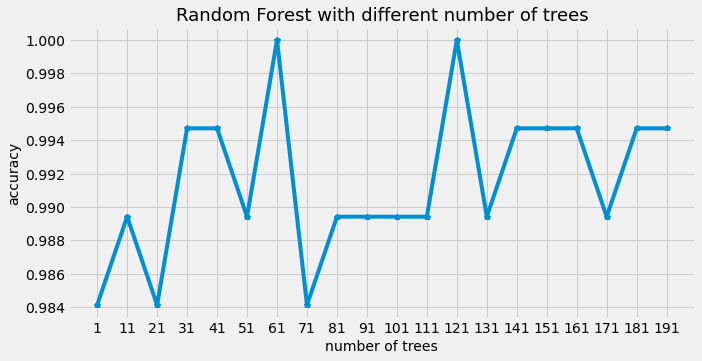

In [44]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range (1,200,10):
    
    # Create the model
    model_ran = RandomForestClassifier(n_estimators=i, bootstrap = True, max_features=None)
    models.append(model_ran)

    # Fit on training data
    model_ran.fit(X_train_ran, y_train_ran)

    # Actual class predictions
    y_pred_ran = model_ran.predict(X_test_ran)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ran, y_pred_ran))
    reports.append(classification_report(y_test_ran,y_pred_ran, zero_division=0))
    models.append(model_ran)
    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Random Forest with different number of trees", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('number of trees', fontsize=14)
plt.xticks(np.arange(1, 201, 10))
# plt.yticks(np.arange(0.9, 1.05, 0.05))
plt.show()

In [45]:
best_index = np.argmax(accuracy)   # start with index 0
best_model = models[best_index]
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_numTrees = 1 + best_index*10
algorithms_accuracy.append(accuracy[best_index])

### Best Forest:

In [46]:
print("Best Random Forest with", best_numTrees, " trees\nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best Random Forest with 61  trees
with accuracy 1.0 

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



Text(0.5, 1.0, 'Confusion matrix')

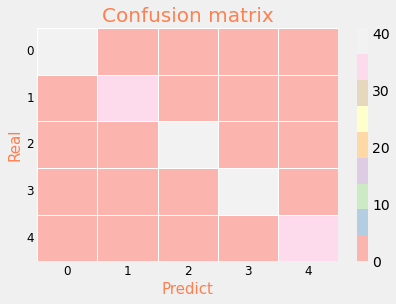

In [47]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

#### See featurs importance:

In [48]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Random Forest'] = importances

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_ran = []
features_list_order = []
for v, i in feature_importances:
    importances_ran.append(i)
    features_list_order.append(v)

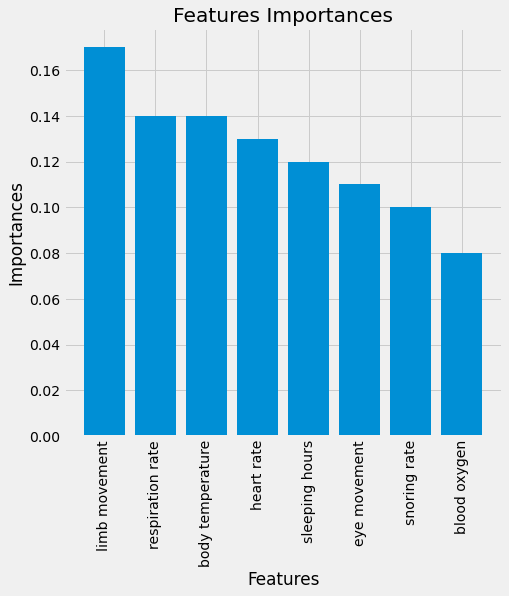

In [49]:
p_ran = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.2, 0.02))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_ran, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features'); plt.title('Features Importances');

#### Now we will try to use less features- throw the less important features:

--------Random Forest with 8 most important features--------

The chosen featurs:
 ['respiration rate', 'snoring rate', 'eye movement', 'body temperature', 'limb movement', 'blood oxygen', 'sleeping hours', 'heart rate']
Accuracy: 0.9894179894179894 


--------Random Forest with 7 most important features--------

The chosen featurs:
 ['respiration rate', 'snoring rate', 'eye movement', 'body temperature', 'limb movement', 'blood oxygen', 'sleeping hours']
Accuracy: 0.9947089947089947 


--------Random Forest with 6 most important features--------

The chosen featurs:
 ['respiration rate', 'snoring rate', 'eye movement', 'body temperature', 'limb movement', 'blood oxygen']
Accuracy: 0.9947089947089947 


--------Random Forest with 5 most important features--------

The chosen featurs:
 ['respiration rate', 'snoring rate', 'eye movement', 'body temperature', 'limb movement']
Accuracy: 0.9841269841269841 


--------Random Forest with 4 most important features--------

The chosen featurs:


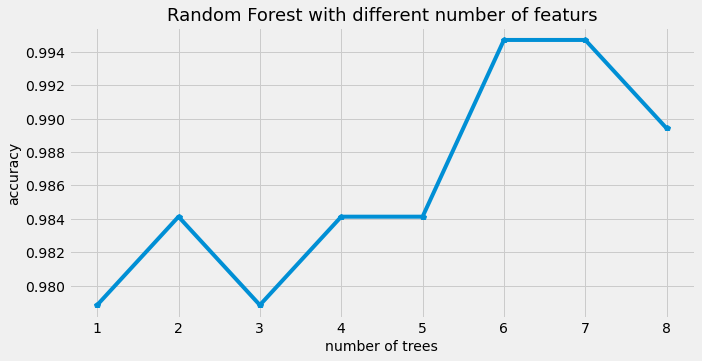

In [78]:
x = []
accuracy = []
matrixs = []
reports = []
for i in range (8,0,-1):
    
    # Create new data, with the most importent i-features 
    X_ran_new = df[features_list_order[:i]]
    y_ran_new = df['stress level'] 

    # train test split
    X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(X_ran_new, y_ran_new, test_size=0.3, random_state=42)
    
    # Create the model
    model_ran = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features=None)
    models.append(model_ran)

    # Fit on training data
    model_ran.fit(X_train_ran, y_train_ran)

    # Actual class predictions
    y_pred_ran = model_ran.predict(X_test_ran)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ran, y_pred_ran))
    reports.append(classification_report(y_test_ran,y_pred_ran, zero_division=0))
    
    print('--------Random Forest with', i, "most important features--------\n")
    print("The chosen featurs:\n", features_list_order[:i])
    print("Accuracy:", accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None),"\n\n")

p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Random Forest with different number of featurs", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('number of trees', fontsize=14)
plt.xticks(np.arange(1, 9, 1))
plt.show()

* Surprisingly- Taking all features doesn't give the highest accuracy, but still make sense with the previous observation because it good to take almost all features (and taking all fetures still cause better result then taking squrt/log of the features).

## 4. KNN

We will check KNN algorithm with different numbers of neighbors

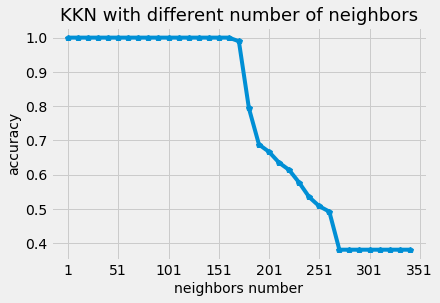

In [51]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range (1,350,10):
    
    # Train Test spilt
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = X_train, X_test, y_train, y_test
    
    #Create the model with i Neighbors
    model_knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit on training data
    model_knn.fit(X_train_knn, y_train_knn)
    
    # Actual class predictions
    y_pred_knn = model_knn.predict(X_test_knn)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_knn, y_pred_knn))
    reports.append(classification_report(y_test_knn,y_pred_knn, zero_division=0))
    models.append(model_knn)#best_model = models[best_index]

    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

plt.plot(x, accuracy, 'p', linestyle="-")
plt.xticks(np.arange(1, 352, 50))
plt.title("KKN with different number of neighbors", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('neighbors number', fontsize=14)
plt.show()

* KNN get 100% accuracy when it based on 1-161 neighbors.
* The chosen model will based on 1 neighbor.

In [52]:
best_index = np.argmax(accuracy)   # start with index 0
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_neighbors = 1 + best_index*2
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

print("Best KNN with ", best_neighbors, "neighbors. \nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best KNN with  1 neighbors. 
with accuracy 1.0 

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



Text(0.5, 1.0, 'Confusion matrix')

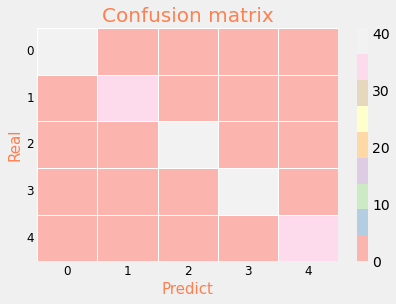

In [53]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

## 5. Adaboost

We will check Adaboost algorithm with different numbers of estimators


--------Adaboost with 1 estimators--------

confusion matrix:
[[ 0 39  0  0  0]
 [ 0 36  0  0  0]
 [ 0 41  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0  0  0 36]]

accuracy: 0.38095238095238093 


--------Adaboost with 2 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 35  0  0  0]
 [ 0 41  0  0  0]
 [ 0 37  0  0  0]
 [ 0  1  0  0 35]]

accuracy: 0.5767195767195767 


--------Adaboost with 3 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  0  1  0]
 [ 0  0  0 41  0]
 [ 0  0  0 37  0]
 [ 0  0  0  1 35]]

accuracy: 0.7671957671957672 


--------Adaboost with 4 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  1 35]]

accuracy: 0.9788359788359788 


--------Adaboost with 5 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  1 35]]

accuracy: 0.9788359788359788 


--------Adaboost with 6 estimators--------

confusion matrix:
[[39  0

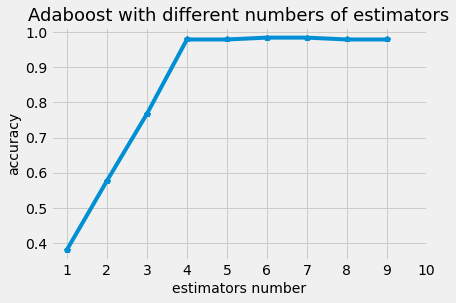

In [110]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range(1,10):

    # Train Test spilt
    X_train_ada, X_test_ada, y_train_ada, y_test_ada = X_train, X_test, y_train, y_test

    #Create the adaboost model
    model_ada = AdaBoostClassifier( n_estimators=i, learning_rate=0.1) 

    # Fit on training data
    model_ada.fit(X_train_ada, y_train_ada)

    # Actual class predictions
    y_pred_ada = model_ada.predict(X_test_ada)

    print('--------Adaboost with', i, "estimators--------\n")
    print('confusion matrix:')
    print(confusion_matrix(y_test_ada, y_pred_ada))
    print("\naccuracy:", accuracy_score(y_test_ada, y_pred_ada, normalize=True, sample_weight=None),"\n\n")
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ada, y_pred_ada, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ada, y_pred_ada))
    reports.append(classification_report(y_test_ada,y_pred_ada, zero_division=0))
    models.append(model_ada)
    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

plt.plot(x, accuracy, 'p', linestyle="-")
plt.xticks(np.arange(1, 11, 1))
plt.title("Adaboost with different numbers of estimators", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('estimators number', fontsize=14)
plt.show()

* We can see that the accuracy score doesnt change in models that baised on 4 or more features
* We assume that the reason is that Adaboost gives zero weight to the four last importent features

In [111]:
best_index = np.argmax(accuracy)   # start with index 0
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_estimators = best_index
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

In [112]:
print("The best Adaboost is with ", best_estimators, "max-estimators\naccuracy:", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

The best Adaboost is with  5 max-estimators
accuracy: 0.9841269841269841 

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        36
           2       0.98      0.98      0.98        41
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



Text(0.5, 1.0, 'Confusion matrix')

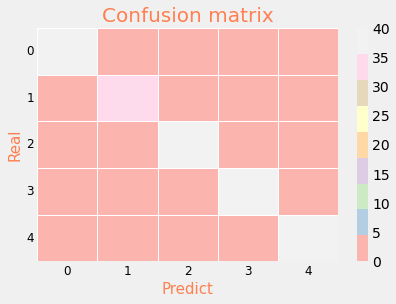

In [113]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

#### See featurs importance:

In [114]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Adaboost'] = importances

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_ada = []
features_list_order = []
for v, i in feature_importances:
    importances_ada.append(i)
    features_list_order.append(v)

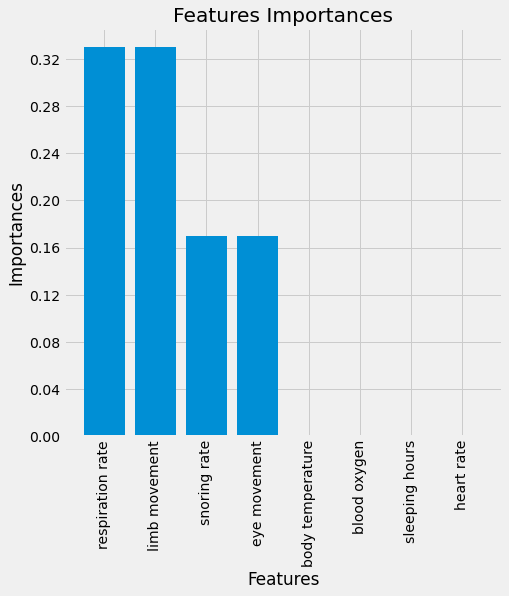

In [115]:
p_ada = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.54, 0.04))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_ada, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features'); plt.title('Features Importances');

* As we assumed, Adaboost gives non-zero weight just for four features

# Conclusions

### Models results:

We get 100% accuracy in the three algorithms- Logistic Reggression, Descion Tree and Random Forest

Text(0.5, 1.0, 'Algorithm')

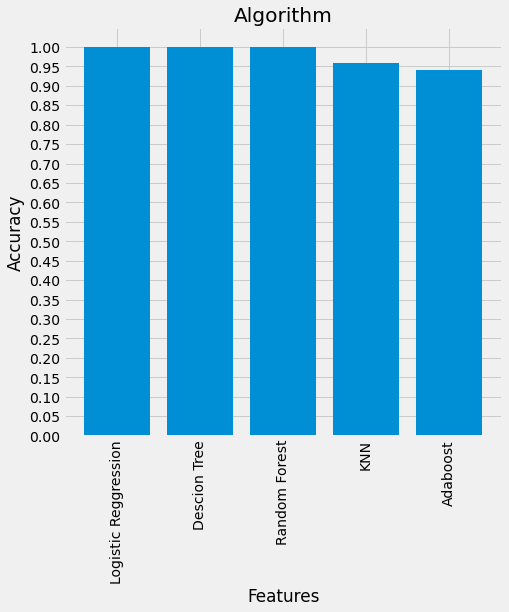

In [60]:
p = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 1.05, 0.05))
# plt.yticks(np.arange(0.05, 0.15, 0.01))
agorithms = ['Logistic Reggression', 'Descion Tree', 'Random Forest', 'KNN', 'Adaboost']

x_values = list(range(len(agorithms)))
plt.bar(x_values, all_accuracy, orientation = 'vertical')
plt.xticks(x_values, agorithms, rotation='vertical')
plt.ylabel('Accuracy'); plt.xlabel('Features')
plt.title('Algorithm')

### What is the most important parameters that effect stress level?

To understand which is the most importent parameters when we want to have a low stress level, we can look in the different models, and see which features each of them consider as the most importent:  

In [119]:
df_importance

,Descion Tree,Random Forest,Adaboost,Logistic Reggression
snoring rate,0.501699,0.104480,0.166667,-2.191854
respiration rate,0.000000,0.136999,0.333333,-2.130169
body temperature,0.000000,0.143637,0.000000,3.051732
limb movement,0.251135,0.168051,0.333333,-2.816027
blood oxygen,0.000000,0.080781,0.000000,2.734266
eye movement,0.000000,0.114334,0.166667,-3.753940
sleeping hours,0.247166,0.121627,0.000000,3.766334
heart rate,0.000000,0.130091,0.000000,-2.130169


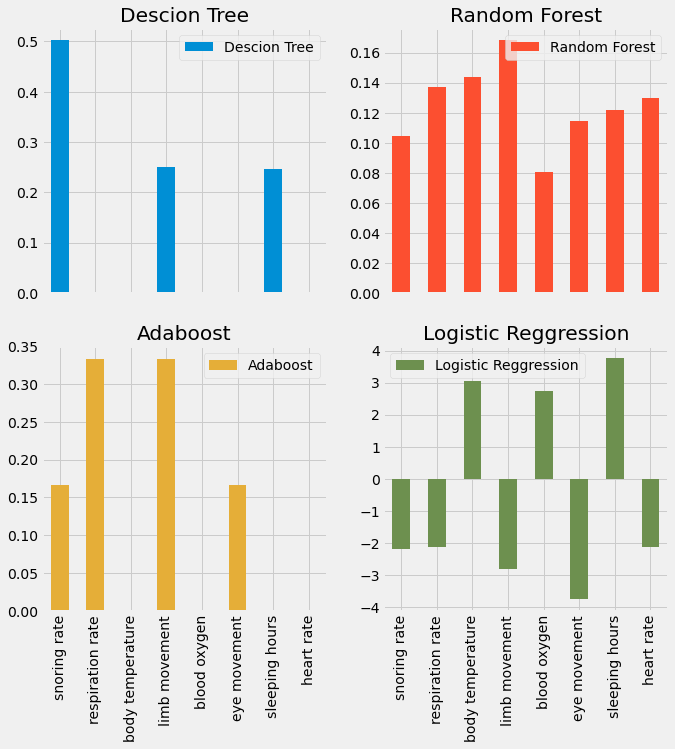

In [120]:
p = df_importance.plot(subplots=True, kind='bar', layout=(2,2), figsize=(10, 10))

<AxesSubplot:>

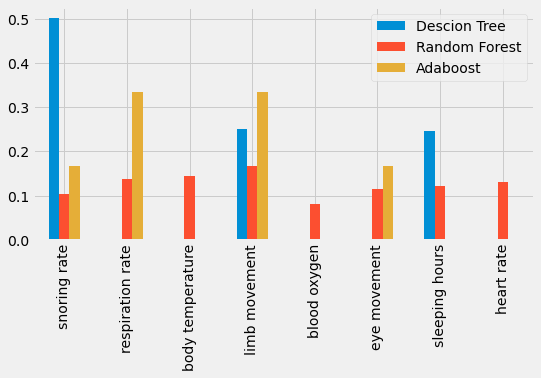

In [118]:
df_importance_withoutLR = df_importance.drop('Logistic Reggression', axis=1, inplace=False)
df_importance_withoutLR.plot(kind='bar', figsize=(8, 4))

We assumed that all models will consider 'sleeping hours' as the most importent parameter, but surprisingly  we see that:

* Logistic Regression based on all the features (gives non-zero weight to all features). 
  The most importent feautures are sleeping hours and eye movement, when between 'sleeping hours' to 'stress level' there is high correlation, and between eye movement to stress level there is a cross-correlation.


* Adaboost based on only four features- 'eye movement', 'snoring rate', 'respiration rate' and 'limb movement'.
  It also consider respiration rate and limb movement to features with high importance.


* Descion Tree based on only three features- 'limb movement', 'snoring rate' and 'sleeping hours'.
  By it, the most important feature is 'snoring rate'.
  
  
* Random Forest also consider 'limb movement' as the most importent feature
  It based on all the features.


### Should we prefer long and low quality sleeping, or short sleeping but with hight quality?

For deciding which values in 'sleeping hours' will define long sleep, we will look at the graph:

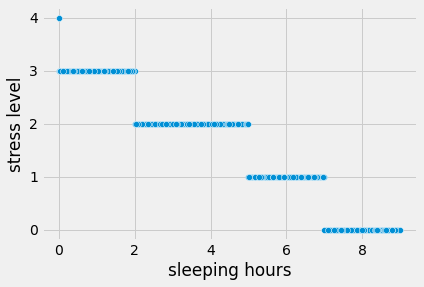

In [64]:
# ax = sns.regplot(x='sleeping hours', y='stress level', data=df)
ax = sns.scatterplot(data=df, x='sleeping hours', y='stress level')

We can see that for getting stress level of 0, 'sleeping hours' need to be at least 7 hours.

#### Answer by Logistic Regression model

Lets look at Logistic Regression model.
By it, 'sleeping hours' feature gets the heaviest weight. The next feature with the highest weight'and, after it is 'eye movement' feature.
We will define quality sleep by this feature, and compare between long and low quality sleeping to short sleeping but with high quality

For deciding which values in 'eye movement' will define a quality sleep, we will look at the graph:

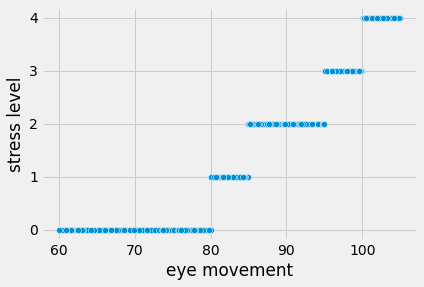

In [65]:
# sns.scatterplot(data=df, x='eye movement', y='body temperature', hue='stress level')
ax = sns.scatterplot(data=df, x='eye movement', y='stress level')

We can see that for getting stress level of 0, 'eye movement' between 60-80

In [66]:
# create data from the chosen features:
df_compereLR =  df[[ 'eye movement','stress level']]

# define long sleeping:
df_compereLR.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compereLR.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# define quality sleeping:
df_compereLR.loc[df['eye movement'] < 80, 'Quality'] = 'good eye movement'
df_compereLR.loc[df['eye movement'] >= 80, 'Quality'] = 'bad eye movement'


df_compereLR.groupby(['stress level','Quality', 'Sleeping hours']).count()

C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


eye movement
stress level Quality           Sleeping hours              
0            bad eye movement  long                       1
             good eye movement long                     125
1            bad eye movement  long                       1
                               short                    125
2            bad eye movement  short                    126
3            bad eye movement  short                    126
4            bad eye movement  short                    126

We can see that by this definetion there is long sleep that is not in good quality (with bad eye movement)- just two samples, but there is no short sleep that in good quality sleep (with good eye movement) at all.

Text(0.5, 0.98, 'Dependence of stress level on sleeping hours and eye movement')

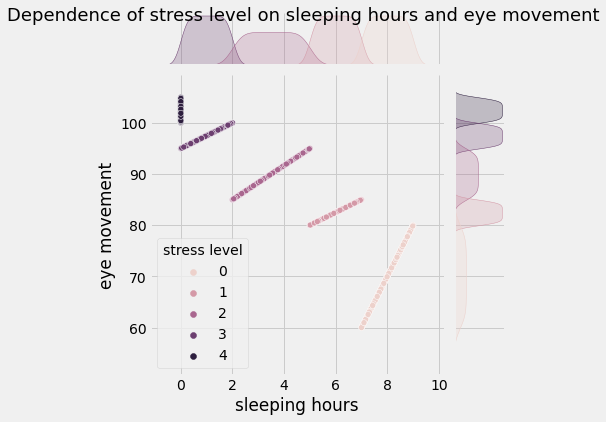

In [139]:
p = sns.jointplot(x='sleeping hours', y='eye movement', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and eye movement", fontsize=18)

* We can see that the more you sleep, the less you have eye movement (and the contrary). 
* It makes sense that there are almost no samples for short sleeping hours and low eye movement (quality sleep) and for the oposite.

#### Answer by Random Forest model

Lets try this process with Random Forest model (that not consider 'sleeping hours' as the most importent feature).

The nost importent feature is- 'limb movement' feature.
For deciding which values in 'limb movement', we will look at the graph:

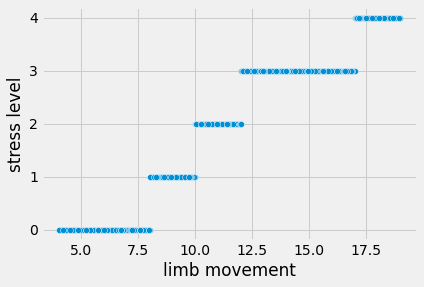

In [130]:
# sns.scatterplot(data=d, x='respiration rate', y='blood oxygen', hue='stress level')
ax = sns.scatterplot(data=df, x='limb movement', y='stress level')

We can see that for getting stress level of 0, 'limb movement' is between 8

In [131]:
# create data from the chosen features:
df_compereRAN =  df[['limb movement','stress level']]

# # define long sleeping:
df_compereRAN.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compereRAN.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# define quality sleeping:
df_compereRAN.loc[df['limb movement'] < 18, 'Quality'] = 'good limb movement'
df_compereRAN.loc[df['limb movement'] >= 18, 'Quality'] = 'bad limb movement'
# df_compereRAN.loc[(df_compereRAN['respiration rate'] < 18) & (df_compereRAN['blood oxygen'] >= 95), 'quality'] = True
# df_compereRAN.loc[(df_compereRAN['respiration rate'] >= 18) & (df_compereRAN['blood oxygen'] < 95), 'quality'] = False

df_compereRAN.groupby(['stress level','Quality', 'Sleeping hours']).count()

C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


limb movement
stress level Quality            Sleeping hours               
0            good limb movement long                      126
1            good limb movement long                        1
                                short                     125
2            good limb movement short                     126
3            good limb movement short                     126
4            bad limb movement  short                      63
             good limb movement short                      63

We can see that short sleeping doesn't mean that for sure its not quality sleeping.
About the oposite (long and not quality sleeping) we can't see from this data, because we dont have samples for this.

Text(0.5, 0.98, 'Dependence of stress level on sleeping hours and limb movement')

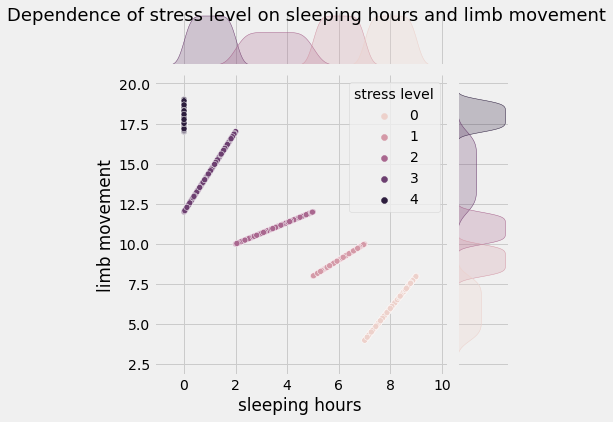

In [138]:
p = sns.jointplot(x='sleeping hours', y='limb movement', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and limb movement", fontsize=18)

* We can see that the more you sleep, the less you have limb movement (and the contrary). 
* It makes sense that there are almost no samples for short sleeping hours and low limb movement (quality sleep) and for the oposite.

#### Answer by Descion Tree model

The nost importent feature is- 'snoring rate' feature.
For deciding which values in 'snoring rate', we will look at the graph:

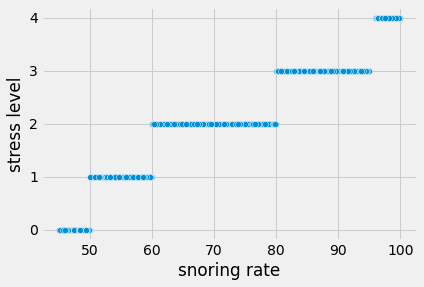

In [126]:
ax = sns.scatterplot(data=df, x='snoring rate', y='stress level')

In [127]:
# create data from the chosen features:
df_compare_dt =  df[['snoring rate', 'stress level']]

# # define long sleeping:
df_compare_dt.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compare_dt.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# # define quality sleeping:
df_compare_dt.loc[ df['snoring rate'] <= 50, 'Quality'] = 'good snoring rate'
df_compare_dt.loc[df['snoring rate'] > 50, 'Quality'] = 'bad snoring rate'

df_compare_dt.groupby(['stress level','Quality','Sleeping hours']).count()

C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


snoring rate
stress level Quality           Sleeping hours              
0            good snoring rate long                     126
1            bad snoring rate  long                       1
                               short                    124
             good snoring rate short                      1
2            bad snoring rate  short                    126
3            bad snoring rate  short                    126
4            bad snoring rate  short                    126

We can see that by this definetion there is long sleep that is not in good quality (with bad snoring rate)- just one sample, and also there is one sample for short sleep that in good quality (with good limb movement).

This two samples are from stress level-1, so we cant answere the quation by it.

Text(0.5, 0.98, 'Dependence of stress level on sleeping hours and snoring rate')

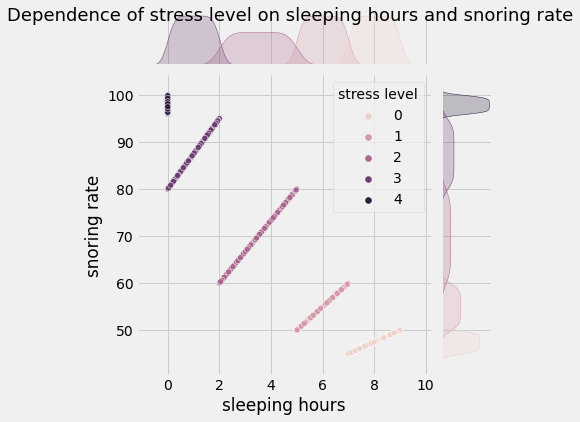

In [129]:
p = sns.jointplot(x='sleeping hours', y='snoring rate', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and snoring rate", fontsize=18)

* We can see that the more you sleep, the less you have snoring rate (on the contrary). 
* It makes sense that there are almost no samples for short sleeping hours and low snoring rate (quality sleep) and for the oposite.

#### Answer by Adaboost model 	

The nost importent feature is- 'respiration rate' feature.
For deciding which values in 'respiration rate', we will look at the graph:

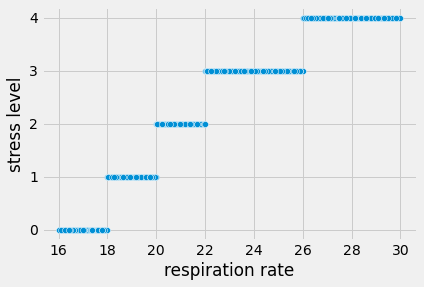

In [133]:
ax = sns.scatterplot(data=df, x='respiration rate', y='stress level')

In [137]:
# create data from the chosen features:
df_compareAda =  df[['respiration rate', 'stress level']]

# # define long sleeping:
df_compareAda.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compareAda.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# # define quality sleeping:
df_compareAda.loc[ df_compareAda['respiration rate'] <= 18, 'Quality'] = 'good respiration rate'
df_compareAda.loc[df_compareAda['respiration rate'] > 18, 'Quality'] = 'bad respiration rate'

df_compareAda.groupby(['stress level','Quality','Sleeping hours' ]).count()

C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\hwiesel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


respiration rate
stress level Quality               Sleeping hours                  
0            good respiration rate long                         126
1            bad respiration rate  long                           1
                                   short                        124
             good respiration rate short                          1
2            bad respiration rate  short                        126
3            bad respiration rate  short                        126
4            bad respiration rate  short                        126

By this data it is hard to answer the question, because there is just one sample for long sleep that is not in good quality, and one sample for short sleep that in good quality sleep.

Text(0.5, 0.98, 'Dependence of stress level on sleeping hours and respiration rate')

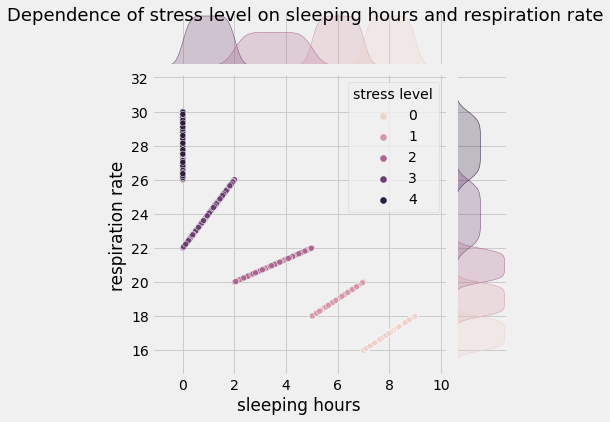

In [135]:
p = sns.jointplot(x='sleeping hours', y='respiration rate', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and respiration rate", fontsize=18)

* We can see that the more you sleep, the lower respiration rate you have (on the contrary). 
* It makes sense that there are almost no samples for short sleeping hours and low respiration rate (quality sleep) or the oposite.

#### Final answere 

* We cant answer this question by this data, because we dont have the needed samples for it.
* It makes sense, it very rare to have quality sleep when we sleep not enough hours.